In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### DATA CLEANING

In [10]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

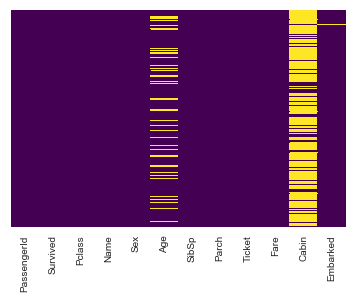

In [12]:
sns.heatmap(data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

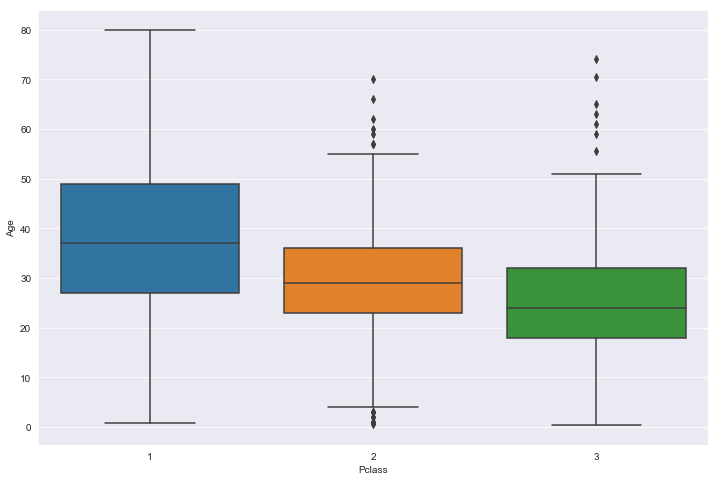

In [16]:
plt.figure(figsize=(12,8
                   ))
sns.boxplot(data['Pclass'],data['Age'])

##### Filling empty Age columns on the basis of mean age of their respective  Pclass

In [17]:
def age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [18]:
data['Age']=data[['Age','Pclass']].apply(age,axis=1)

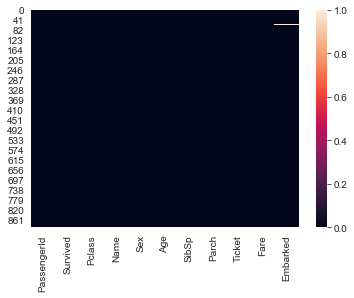

In [20]:
data.drop('Cabin',axis=1,inplace=True)
sns.heatmap(data.isnull())

In [24]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
data['S']=data['Embarked'].map({'S':1,'C':0,'Q':0})
data['C']=data['Embarked'].map({'S':0,'C':1,'Q':0})
data['Q']=data['Embarked'].map({'S':0,'C':0,'Q':1})

In [26]:
data.drop('Embarked',axis=1,inplace=True)

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1.0,0.0,0.0


In [32]:
data.dropna(inplace=True)

In [36]:
data.drop('PassengerId',axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,S,C,Q
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1.0,0.0,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.0,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.0,0.0,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1.0,0.0,0.0


In [37]:
data['Male']=data['Sex'].map({'male':1,'female':0})
data.drop('Sex',axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,S,C,Q,Male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0.0,0.0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,1.0,0.0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1.0,0.0,0.0,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0.0,0.0,1


In [40]:
data.drop('Ticket',axis=1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,S,C,Q,Male
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0
4,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1


### Here we can see with the help of HEATMAP that there is no null values in the data

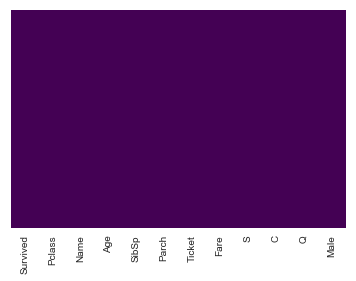

In [38]:
sns.heatmap(data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

#### Age Distribution of the data

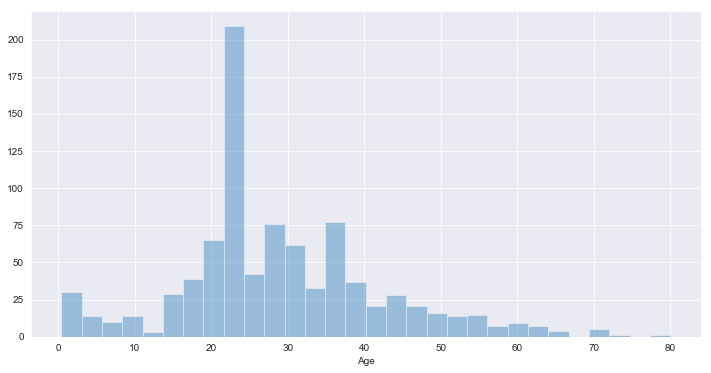

In [235]:
plt.figure(figsize=(12,6))
sns.distplot(data['Age'],bins=30,kde=False)

### Survivors of the train_data according to the Pclass

#### And we can see that the Females of the 3rd Class are the most Survivors

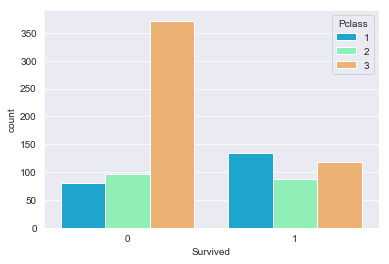

In [238]:
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

#### Fare Distribution 

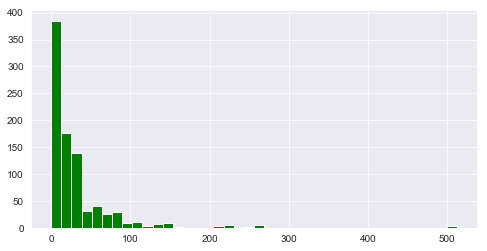

In [239]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

# IMPLEMENTING ML MODELS FOR PREDICTING SURVIVORS

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X=data.drop('Survived',axis=1)
y=data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###### USING LOGISTIC MODEL

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel=LogisticRegression()

In [47]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
prediction=logmodel.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

###### Classification Report ,Confusion Matrix and Accuracy Score of Logistic Regression

In [51]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))
print('\n')
print(accuracy_score(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.67      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.82       267



[[149  14]
 [ 34  70]]


0.8202247191011236


###### USING DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
decmodel=DecisionTreeClassifier()

In [59]:
decmodel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
dec_prediction=decmodel.predict(X_test)

###### Classification Report ,Confusion Matrix and Accuracy Score of Decision Tree Classifier

In [61]:
print(classification_report(y_test,dec_prediction))
print('\n')
print(confusion_matrix(y_test,dec_prediction))
print('\n')
print(accuracy_score(y_test,dec_prediction))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       163
           1       0.75      0.71      0.73       104

   micro avg       0.79      0.79      0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



[[138  25]
 [ 30  74]]


0.7940074906367042


###### USING RANDOM FOREST CLASSIFIER

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc=RandomForestClassifier(n_estimators=200)

In [87]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
rfc_prediction=rfc.predict(X_test)

###### Classification Report ,Confusion Matrix and Accuracy Score of Random Forest Classifier

In [89]:
print(classification_report(y_test,rfc_prediction))
print('\n')
print(confusion_matrix(y_test,rfc_prediction))
print('\n')
print(accuracy_score(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       163
           1       0.80      0.72      0.76       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



[[144  19]
 [ 29  75]]


0.8202247191011236


###### USING SVC

In [77]:
from sklearn.svm import SVC

In [80]:
svcmodel=SVC(kernel='rbf')


In [81]:
svcmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [82]:
svc_prediction=svcmodel.predict(X_test)

###### Classification Report ,Confusion Matrix and Accuracy Score of SVC

In [84]:
print(classification_report(y_test,svc_prediction))
print('\n')
print(confusion_matrix(y_test,svc_prediction))
print('\n')
print(accuracy_score(y_test,svc_prediction))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       163
           1       0.62      0.49      0.55       104

   micro avg       0.69      0.69      0.69       267
   macro avg       0.67      0.65      0.65       267
weighted avg       0.68      0.69      0.68       267



[[132  31]
 [ 53  51]]


0.6853932584269663


###### Finding out best hyperparameter for SVC through GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid={'C':[0.1,1,10,100,1000,10000],
             'gamma':[1,0.1,0.01,0.001,0.00001,0.000001]}

In [93]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [94]:
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6213592233009708, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6213592233009708, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0

[CV] ...... C=100, gamma=0.01, score=0.7259615384615384, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...... C=100, gamma=0.01, score=0.7451923076923077, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...... C=100, gamma=0.01, score=0.7912621359223301, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ................... C=100, gamma=0.001, score=0.75, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..... C=100, gamma=0.001, score=0.7932692307692307, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..... C=100, gamma=0.001, score=0.7815533980582524, total=   0.0s
[CV] C=100, gamma=1e-05 ..............................................
[CV] ..... C=100, gamma=1e-05, score=0.7163461538461539, total=   0.0s
[CV] C=100, gamma=1e-05 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    3.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 1e-05, 1e-06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [95]:
grid_prediction=grid.predict(X_test)

###### Classification Report ,Confusion Matrix and Accuracy Score of GRIDSEARCHCV

In [96]:
print(classification_report(y_test,grid_prediction))
print('\n')
print(confusion_matrix(y_test,grid_prediction))
print('\n')
print(accuracy_score(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       163
           1       0.80      0.72      0.76       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



[[144  19]
 [ 29  75]]


0.8202247191011236


###### Best accuracy score among all the models are displayed below :-

In [98]:
print("Accuracy Score by Logistic Regression                           :  ",accuracy_score(y_test,prediction))
print("Accuracy Score by Decision Tree Classifier                      :  ",accuracy_score(y_test,dec_prediction))
print("Accuracy Score by Random Forest Classifier                      :  ",accuracy_score(y_test,rfc_prediction))
print("Accuracy Score by Support Vector Classifier                     :  ",accuracy_score(y_test,svc_prediction))
print("Accuracy Score by Support Vector Classifier using GRIDSEARCHCV  :  ",accuracy_score(y_test,grid_prediction))

Accuracy Score by Logistic Regression                           :   0.8202247191011236
Accuracy Score by Decision Tree Classifier                      :   0.7940074906367042
Accuracy Score by Random Forest Classifier                      :   0.8202247191011236
Accuracy Score by Support Vector Classifier                     :   0.6853932584269663
Accuracy Score by Support Vector Classifier using GRIDSEARCHCV  :   0.8202247191011236


##### So we can clearly see that Accuracy Score of Logistic Regression , RandomForestClassifier , SVC using GridSearchCV are SAME.So we can use any of this model to predict our actual Survivors in our ' test.csv ' data

In [100]:
test_data=pd.read_csv('test.csv')

In [102]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Cleaning test data for prediction

In [103]:
test_data.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [104]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


In [105]:
test_data['S']=test_data['Embarked'].map({'S':1,'C':0,'Q':0})
test_data['C']=test_data['Embarked'].map({'S':0,'C':1,'Q':0})
test_data['Q']=test_data['Embarked'].map({'S':0,'C':0,'Q':1})

test_data['Male']=test_data['Sex'].map({'male':1,'female':0})
test_data.drop(['Embarked','Sex'],axis=1,inplace=True)
test_data.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,S,C,Q,Male
0,3,34.5,0,0,330911,7.8292,0,0,1,1
1,3,47.0,1,0,363272,7.0000,1,0,0,0
2,2,62.0,0,0,240276,9.6875,0,0,1,1
3,3,27.0,0,0,315154,8.6625,1,0,0,1
4,3,22.0,1,1,3101298,12.2875,1,0,0,0


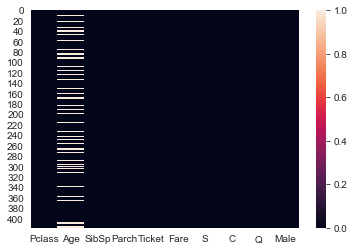

In [106]:
sns.heatmap(test_data.isnull())

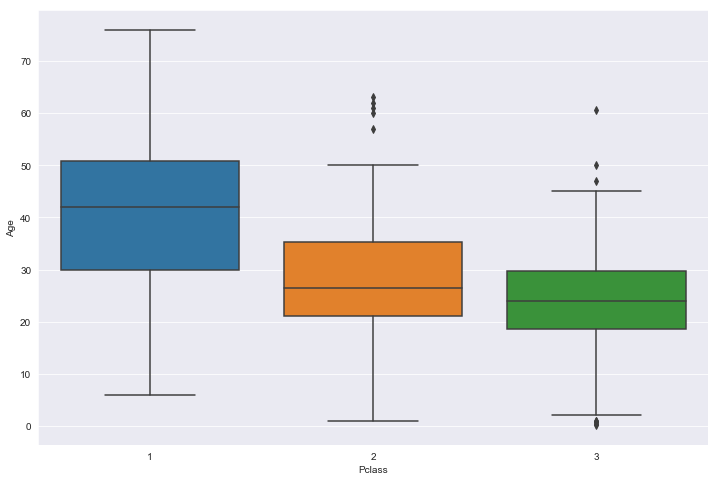

In [108]:
plt.figure(figsize=(12,8))
sns.boxplot(test_data['Pclass'],test_data['Age'])

##### Filling empty Age columns on the basis of mean age of their respective  Pclass

In [110]:
def fillage(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age

In [111]:
test_data['Age']=test_data[['Age','Pclass']].apply(fillage,axis=1)

In [123]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,S,C,Q,Male
0,3,34.5,0,0,7.8292,0,0,1,1
1,3,47.0,1,0,7.0000,1,0,0,0
2,2,62.0,0,0,9.6875,0,0,1,1
3,3,27.0,0,0,8.6625,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0


In [128]:
test_data[['S','C','Q']]=test_data[['S','C','Q']].astype(float)

In [129]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,S,C,Q,Male
0,3,34.5,0,0,7.8292,0.0,0.0,1.0,1
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0
2,2,62.0,0,0,9.6875,0.0,0.0,1.0,1
3,3,27.0,0,0,8.6625,1.0,0.0,0.0,1
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0


In [140]:
test_data.isnull().any()

Pclass    False
Age       False
SibSp     False
Parch     False
Fare       True
S         False
C         False
Q         False
Male      False
dtype: bool

In [149]:
test_data[pd.isnull(test_data).any(axis=1)]

,Pclass,Age,SibSp,Parch,Fare,S,C,Q,Male
152,3,60.5,0,0,NaN,1.0,0.0,0.0,1


In [170]:
test_data['Fare'].mean()

35.6271884892086

In [178]:
def fill_fare(cols):
    Fare=cols
    if pd.isnull(Fare):
        return 35.62
    else:
        return Fare
    

In [179]:
test_data['Fare']=test_data['Fare'].apply(fill_fare)

#### Here we can clearly see that there is no null values in the test_data

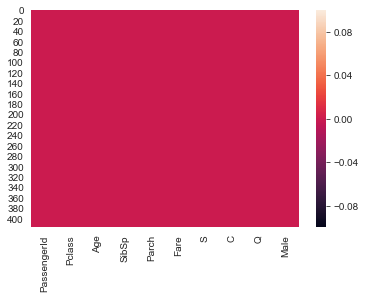

In [232]:
sns.heatmap(test_data.isnull())

In [180]:
test_data.isnull().any()

Pclass    False
Age       False
SibSp     False
Parch     False
Fare      False
S         False
C         False
Q         False
Male      False
dtype: bool

In [181]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,S,C,Q,Male
0,3,34.5,0,0,7.8292,0.0,0.0,1.0,1
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0
2,2,62.0,0,0,9.6875,0.0,0.0,1.0,1
3,3,27.0,0,0,8.6625,1.0,0.0,0.0,1
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0


### As we already found out that the accuracy of Logistic Regression, RandomForestClassifier and SVC using 
### GridSearchCV implemented on the train data is SAME. So we are using only one of the mentioned model.

In [183]:
test_logmodel_prediction=logmodel.predict(test_data)  ##Logistic Regression Model

#test_rfc_prediction=rfc.predict(test_data)            ##RandomForestClassifier Model

#test_grid_prediction=grid.predict(test_data)          ##SVC Model using GridSearchCV

In [244]:
survivor_prediction=pd.DataFrame(test_logmodel_prediction,columns=['Survived'])
survivor_prediction.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [245]:
new=pd.read_csv('test.csv')

In [246]:
survivor_prediction['PassengerId']=new['PassengerId'].copy()

In [248]:
survivor_prediction=survivor_prediction[['PassengerId','Survived']]

In [249]:
survivor_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


### Here we can see that we have predicted the Survivors.

In [250]:
survivor_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


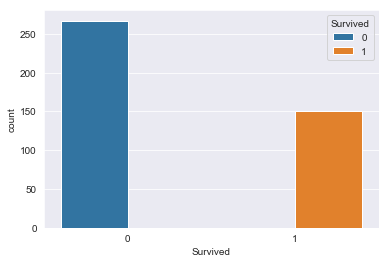

In [252]:
sns.countplot(x='Survived',data=survivor_prediction,hue='Survived')

### So we can see that Female Survivors are more than the Male Survivors

In [253]:
survivor_prediction['Survived'].value_counts()

0    267
1    151
Name: Survived, dtype: int64

In [256]:
survivor_prediction.to_csv('test_prediction.csv',index=False)

### TOP 20 Survivors of the test_data

In [255]:
survivor_prediction.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


#                             THANK YOU